# trainning the model

Training on random 0-90 degree rotation

```bash
python main.py -r 90
```

# Get the model and visualize

In [53]:
import torch
net = torch.load('new_model/same/stn_R90_T0_S0.cpt')

In [2]:
from itertools import product
from lib.train import Trainer
import os
from torchvision import datasets, transforms
from lib.utility import convert_image_np, visualize_stn, wrap, RandomRTS, to_var, to_cuda
import matplotlib.pyplot as plt

def getTest(model, degrees, translations, scalings, visualize=False, use_cuda=torch.cuda.is_available(),
            savename='default', test=False):
    t = Trainer(model, use_cuda=use_cuda)

    test_acc = []
    for degree, translation, scaling in product(degrees, translations, scalings):
        print('r: %d, t: %d, s: %d' % (degree, translation * 100, scaling * 100))
        visual_loader = torch.utils.data.DataLoader(
            datasets.MNIST(root='.', train=False, transform=transforms.Compose([
                RandomRTS(degree=(-degree, degree), translate=(-translation, translation), 
                          scale=(1-scaling, 1+scaling)),
                wrap(transforms.ToTensor()),
                wrap(transforms.Normalize((0.1307,), (0.3081,)))
            ])), batch_size=16, shuffle=False, num_workers=4)

        if test:
            test_acc.append(t.test(visual_loader))
    
        #print(next(iter(visual_loader))[0]['image'].shape)
        if visualize:
            visualize_stn(model, visual_loader, use_cuda=use_cuda, nrow=4)
            savedir = os.path.join("figures", savename)
            os.system('mkdir -p %s' % savedir)
            name = os.path.join(savedir, "R%dT%dS%d.png" % (degree, translation*100, scaling*100))
            plt.savefig(name, bbox_inches='tight')
            plt.show()
    
    return test_acc

r: 45, t: 0, s: 0


/data3/data/jiaxuan/2019/STN-v2/eecs692-reproduction/lib/utility.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(x, *args, **kwargs)


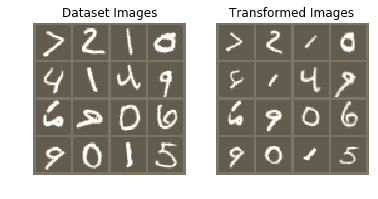

[]

In [59]:
getTest(net, [45], [0], [0], visualize=True)

# a dataset with only 1 image with different variations

In [66]:
def one_image_dataset(model, use_cuda=torch.cuda.is_available()):
    im, label = datasets.MNIST(root='.', train=False)[0]
    degrees = [-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    x = []
    y = []

    trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    for d in degrees:
        tim = transforms.RandomRotation([d,d])(im)
        tim = trans(tim).unsqueeze(0)
        tlabel = label.item()
        x.append(tim)
        y.append(tlabel)
        
    x = torch.cat(x)
    y = torch.LongTensor(y)
    
    visual_loader = torch.utils.data.DataLoader(
       torch.utils.data.TensorDataset(x, y), 
        batch_size=16, shuffle=False, num_workers=4)
    
    visualize_stn(model, visual_loader, use_cuda=use_cuda, nrow=4)
    plt.show()

/data3/data/jiaxuan/2019/STN-v2/eecs692-reproduction/lib/utility.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(x, *args, **kwargs)


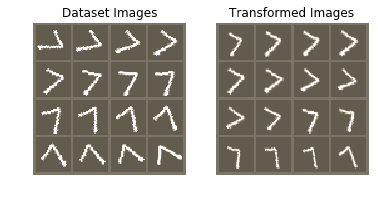

In [75]:
net = torch.load('models/mnist/stn_R90_T0_S0.cpt')
one_image_dataset(net)

/data3/data/jiaxuan/2019/STN-v2/eecs692-reproduction/lib/utility.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(x, *args, **kwargs)


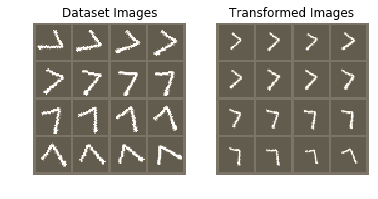

In [76]:
net = torch.load('new_model/same/stn_R90_T0_S0.cpt')
one_image_dataset(net)

The above image shows that STN is not rotation invariant

/data3/data/jiaxuan/2019/STN-v2/eecs692-reproduction/lib/utility.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(x, *args, **kwargs)


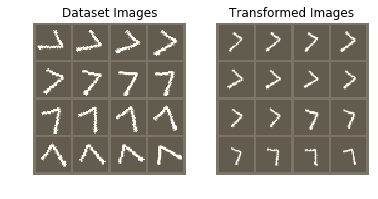

In [77]:
net = torch.load('new_model0.3/same/stn_R90_T0_S0.cpt')
one_image_dataset(net)

/data3/data/jiaxuan/2019/STN-v2/eecs692-reproduction/lib/utility.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(x, *args, **kwargs)


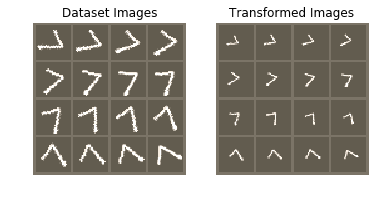

In [79]:
net = torch.load('new_model0.5/same/stn_R90_T0_S0.cpt')
one_image_dataset(net)

In [ ]:
net = torch.load('new_model1/same/stn_R90_T0_S0.cpt')
one_image_dataset(net)